In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("data/telecom_churn.csv")

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Признаки по одному 
## 1.1. Количественные
Гистограмма и боксплот

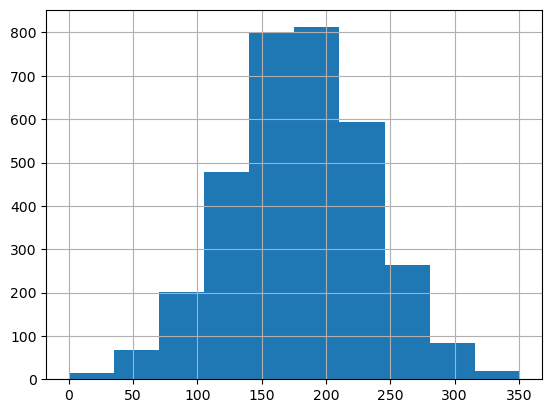

In [4]:
df['Total day minutes'].hist();

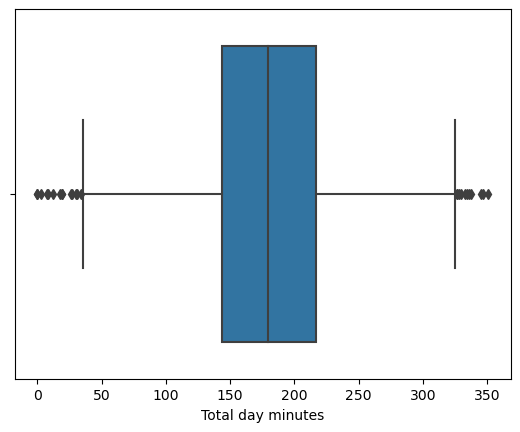

In [6]:
sns.boxplot(x=df["Total day minutes"]);

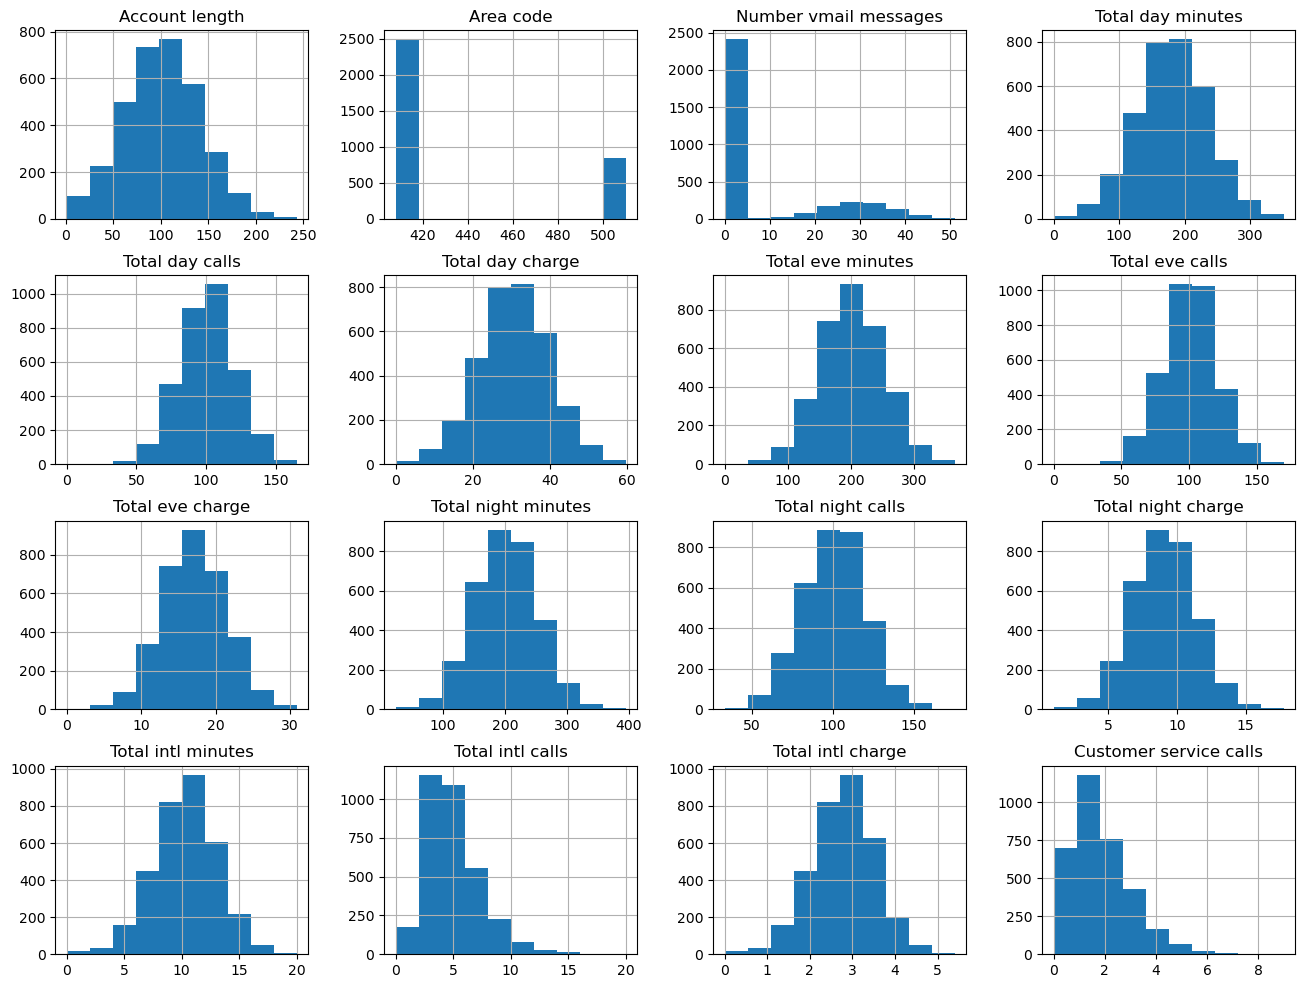

In [8]:
#df["International plan"] = df["International plan"].map({"Yes": 1, "No": 0})
#df["Voice mail plan"] = df["Voice mail plan"].map({"Yes": 1, "No": 0})
#df["Churn"] = df['Churn'].astype(int)
plt.rcParams ['figure.figsize'] = (16,12)
df.hist();

# 1.2. Категориальные
countplot

In [9]:
df["State"].value_cou# 1.2. Категориальные
countplotnts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

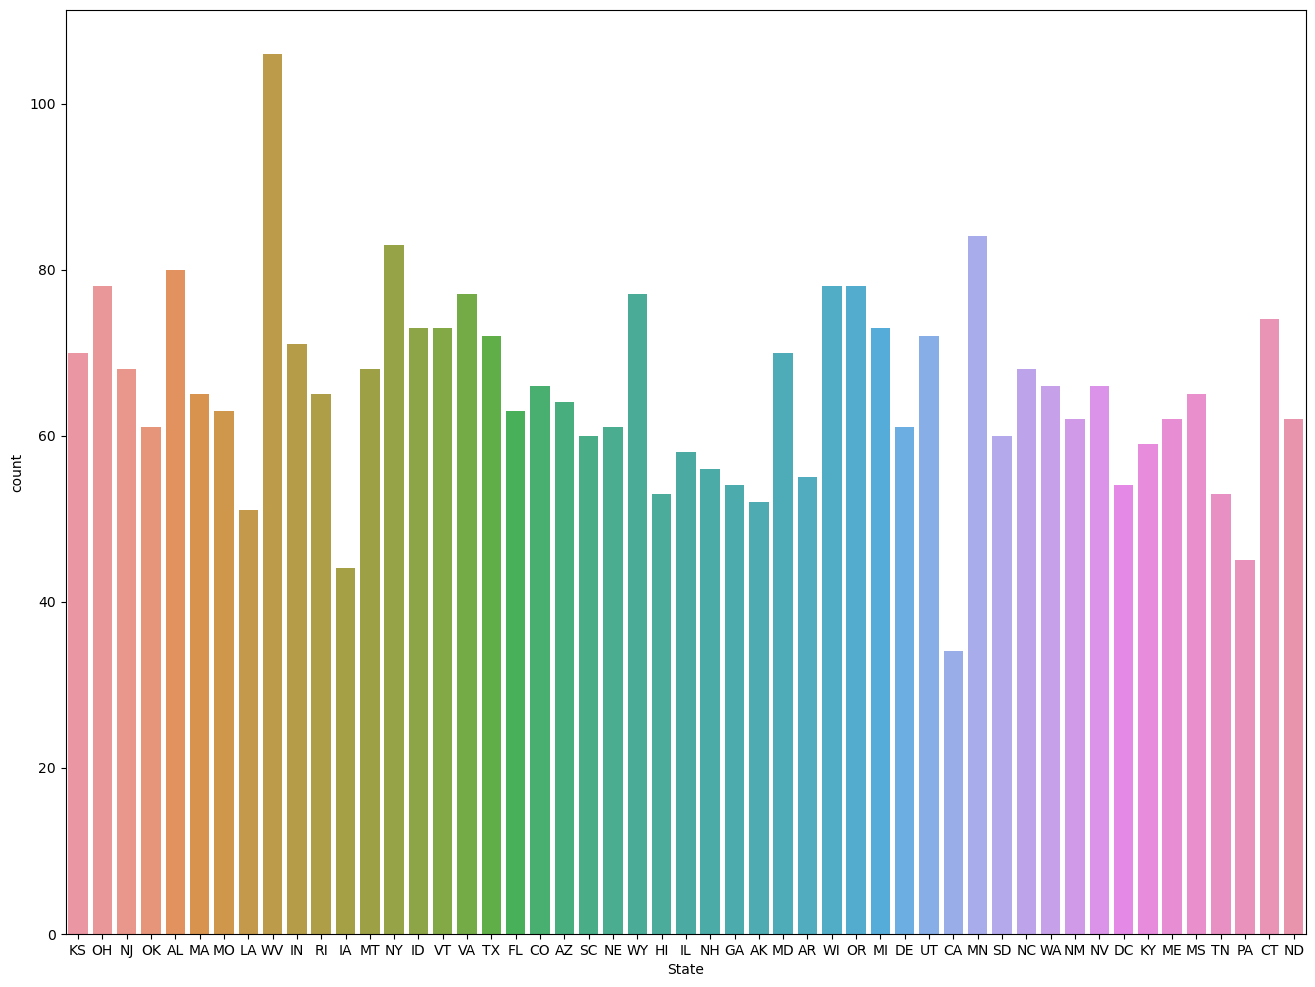

In [36]:
sns.countplot(x=df["State"]);

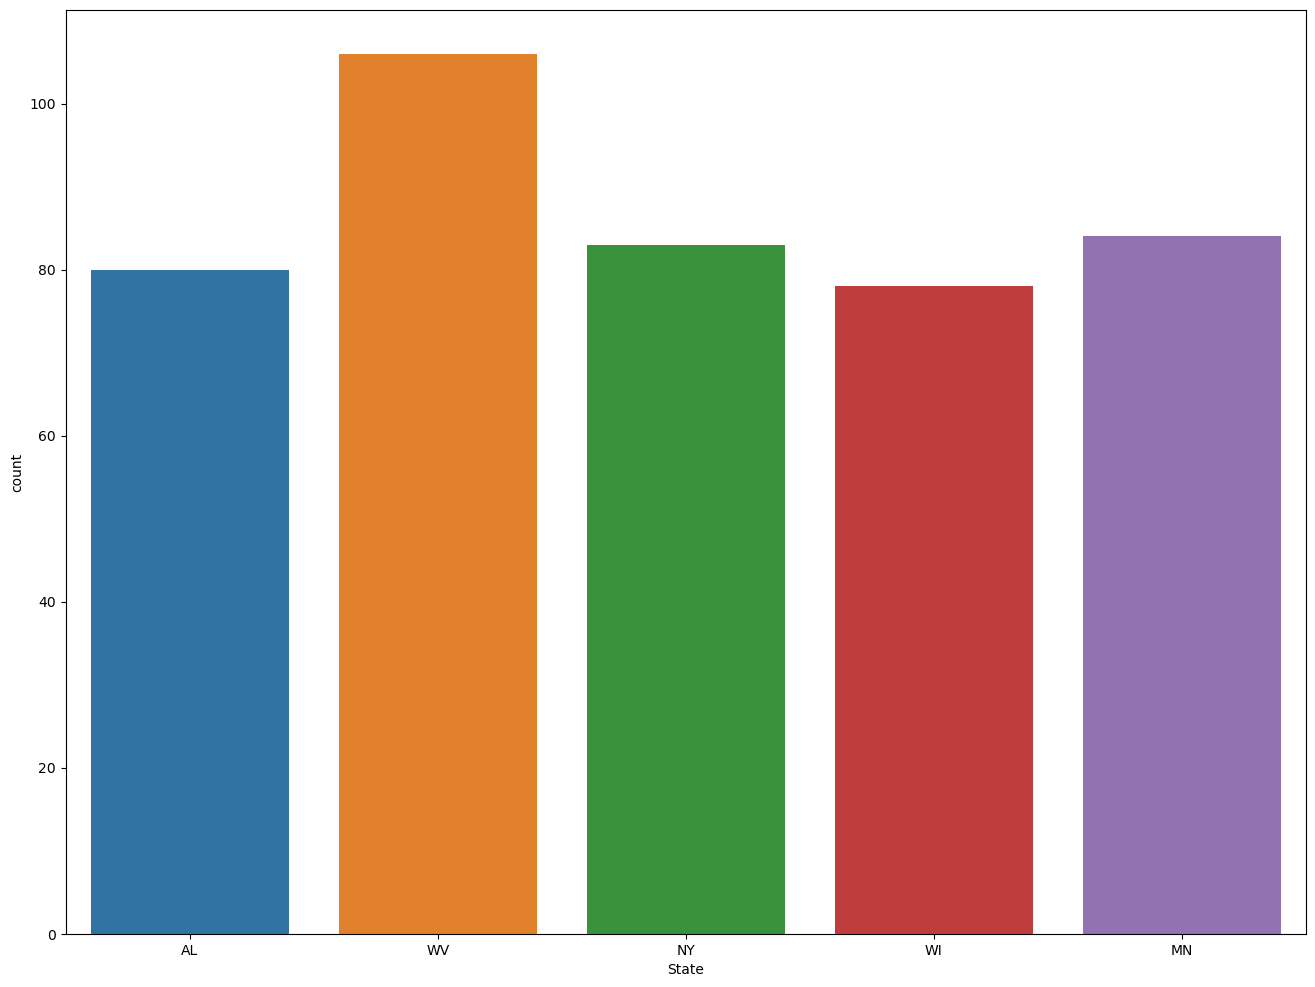

In [38]:
sns.countplot(x=df[df["State"].isin(df["State"].value_counts().head().index)]["State"]);

# 2. Взаимодействия признаков
## 2.1. Количественный с количественным
pairplot, scatterplot, корреляции, heatmap

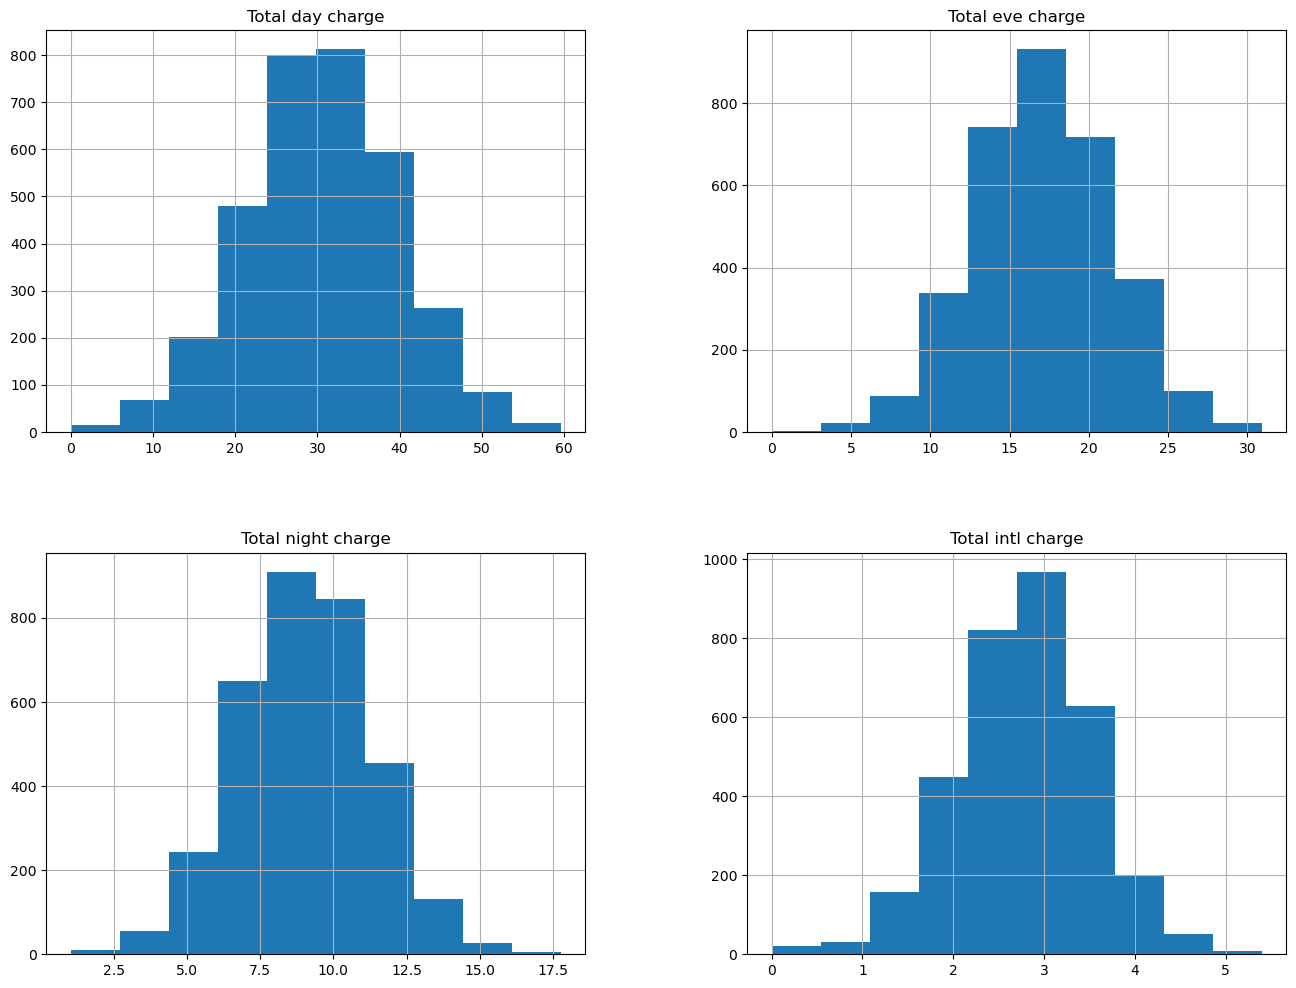

In [10]:
feat = [f for f in df.columns if "charge" in f]
df[feat].hist();

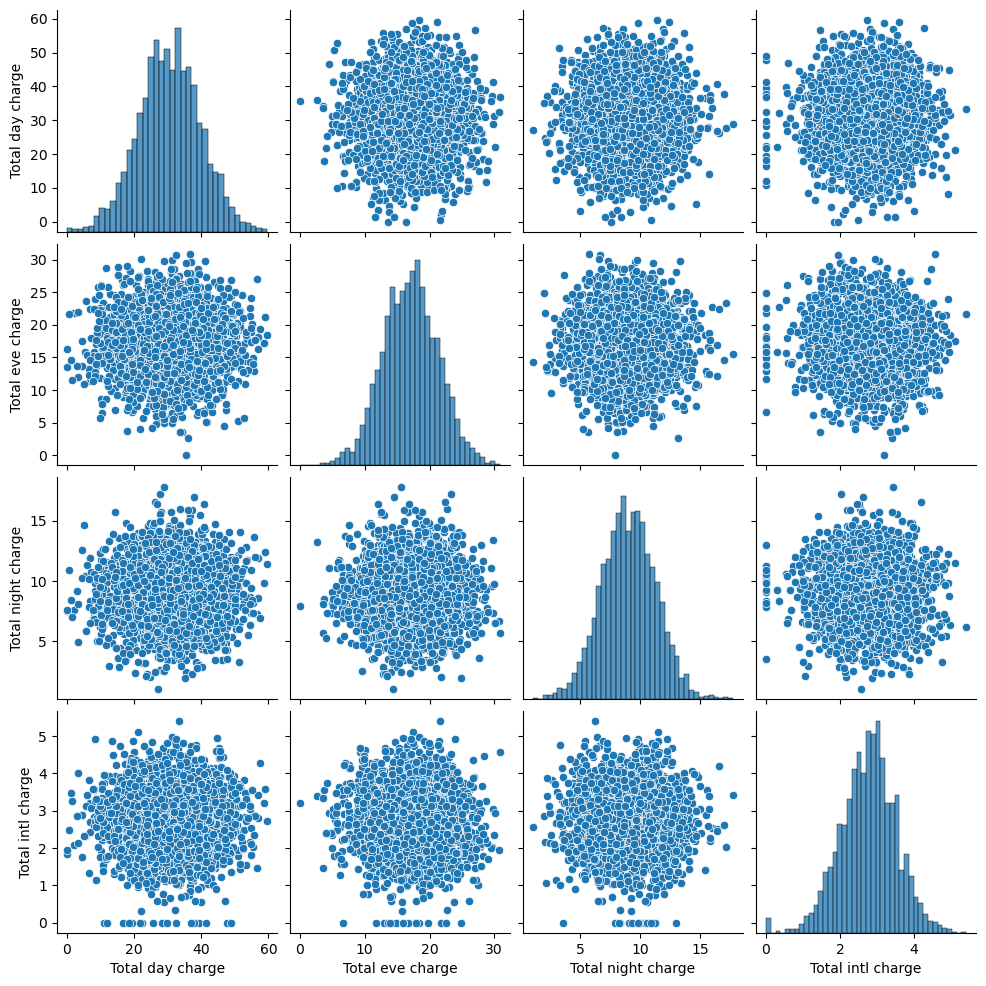

In [12]:
sns.pairplot(df[feat]); # многа

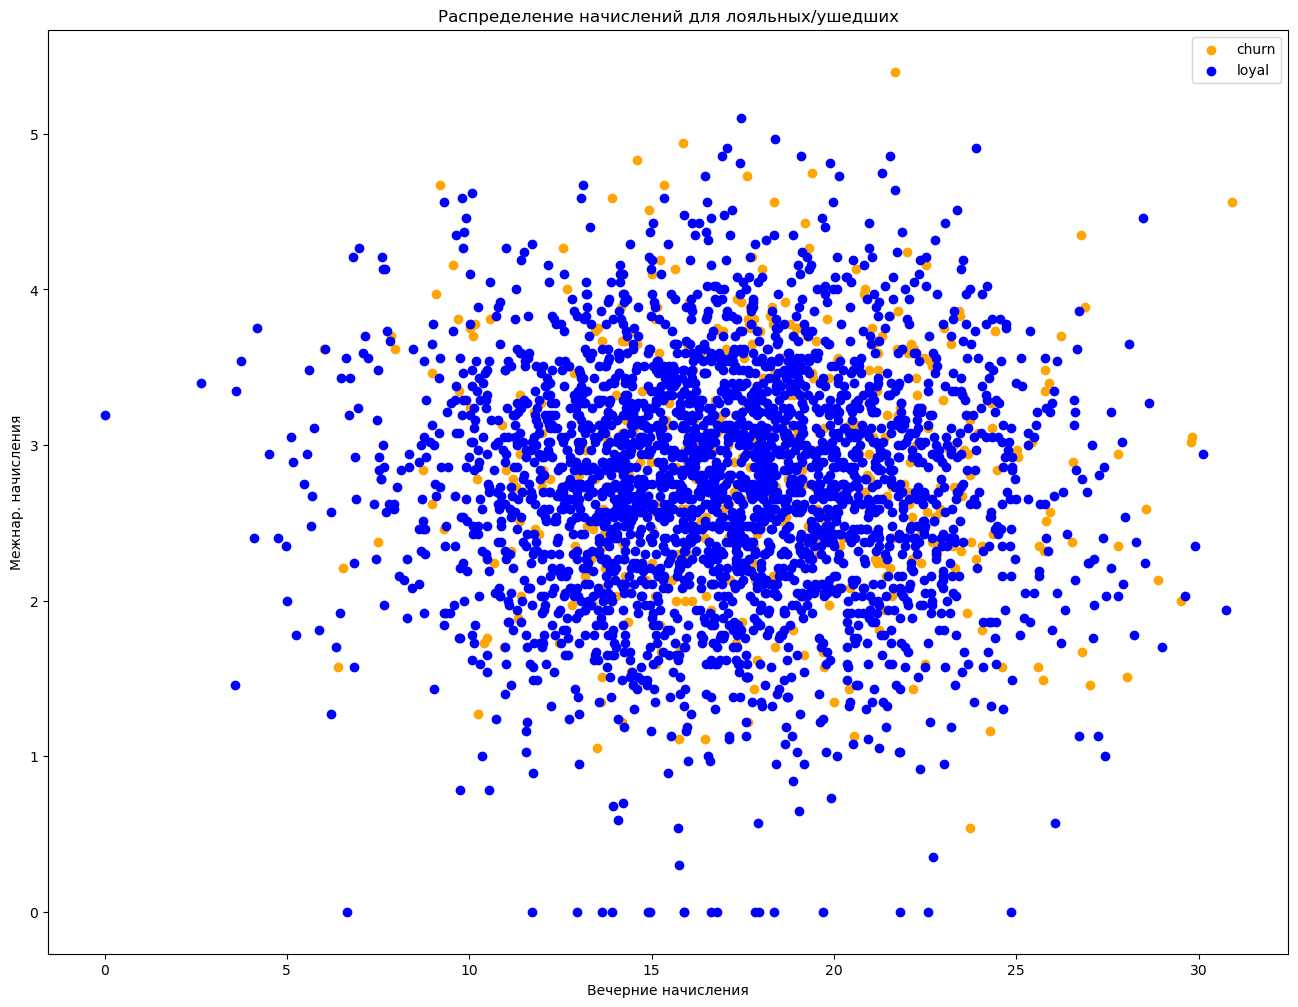

In [13]:
plt.scatter(
    df[df["Churn"]]["Total eve charge"],
    df[df["Churn"]]["Total intl charge"],
    color="orange",
    label="churn",
)
plt.scatter(
    df[~df["Churn"]]["Total eve charge"],
    df[~df["Churn"]]["Total intl charge"],
    color="blue",
    label="loyal",
)
plt.xlabel("Вечерние начисления");
plt.ylabel("Межнар. начисления");
plt.title('Распределение начислений для лояльных/ушедших');
plt.legend();
# можно вставлять и латех

In [14]:
df_for_corr = df.drop(['State','International plan','Voice mail plan'], axis=1)
df_for_corr.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


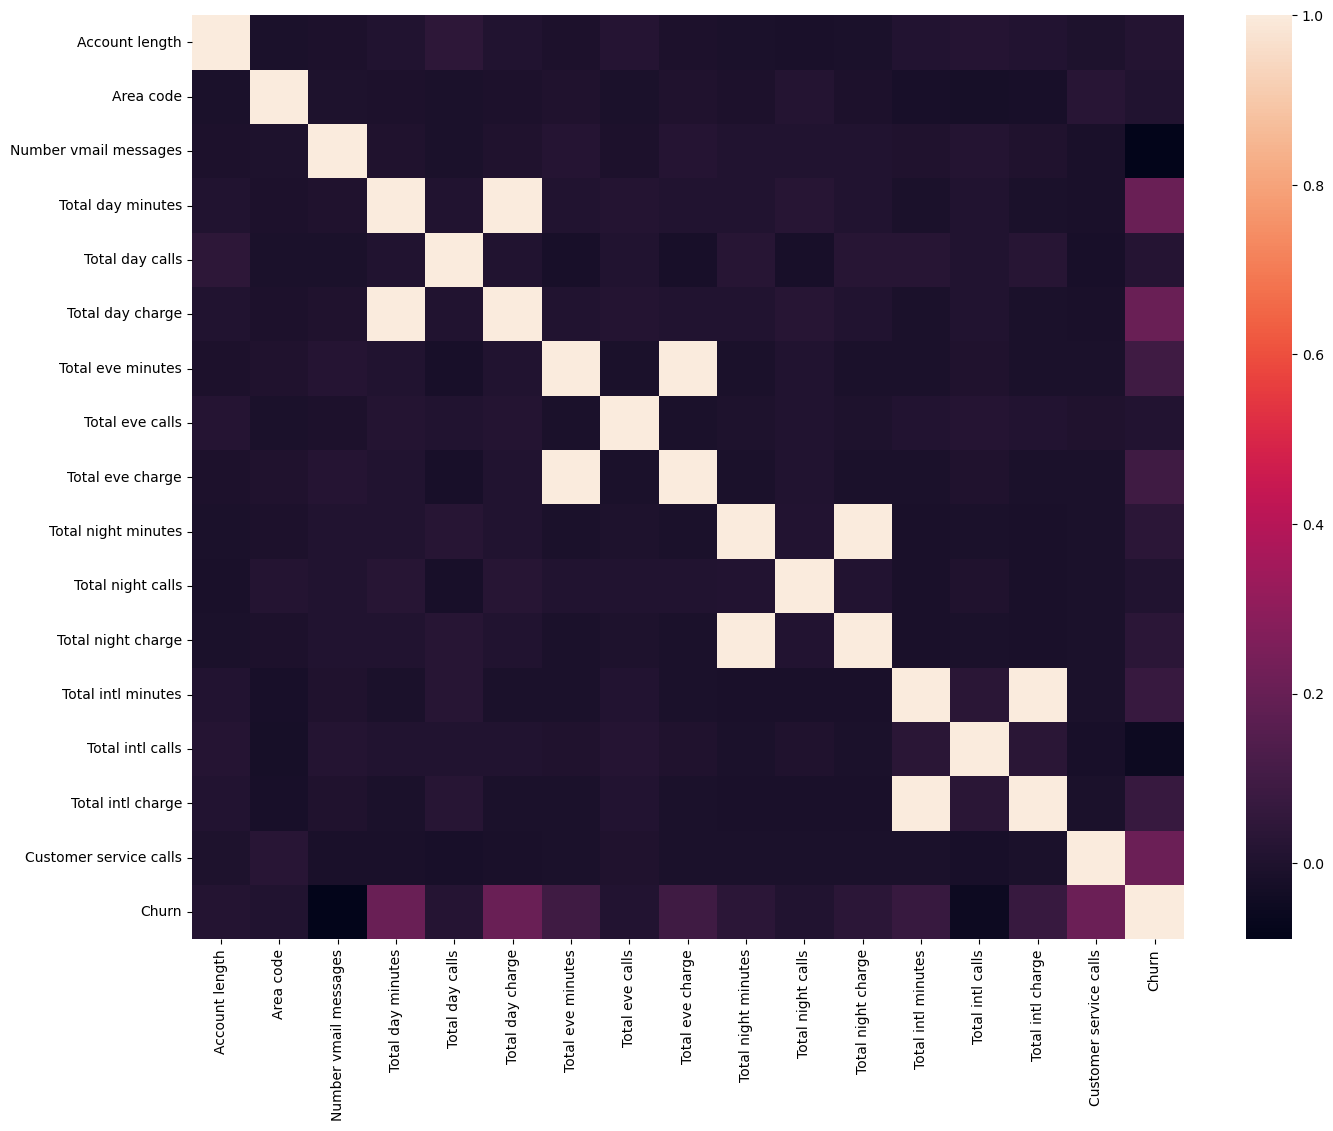

In [16]:
sns.heatmap(df_for_corr.corr());

In [17]:
df.drop(feat, inplace=True, axis=1)

In [18]:
df_for_corr = df.drop(['State','International plan','Voice mail plan'], axis=1)

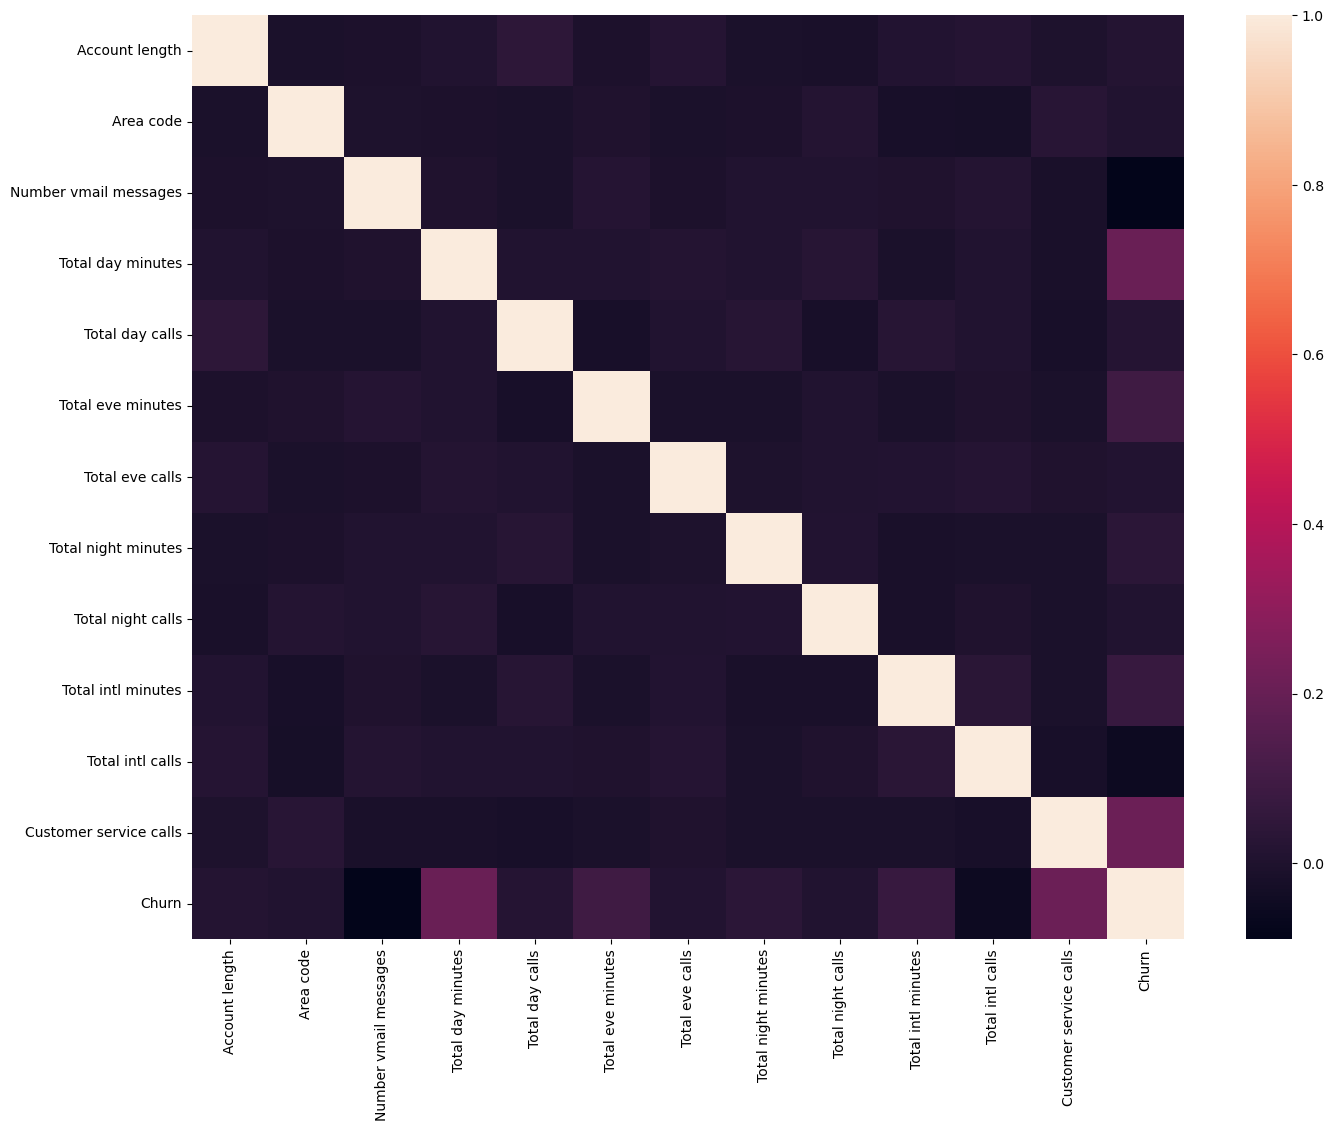

In [19]:
sns.heatmap(df_for_corr.corr());

## 2.2.  Количественный с категориальным
boxplot, violinplot

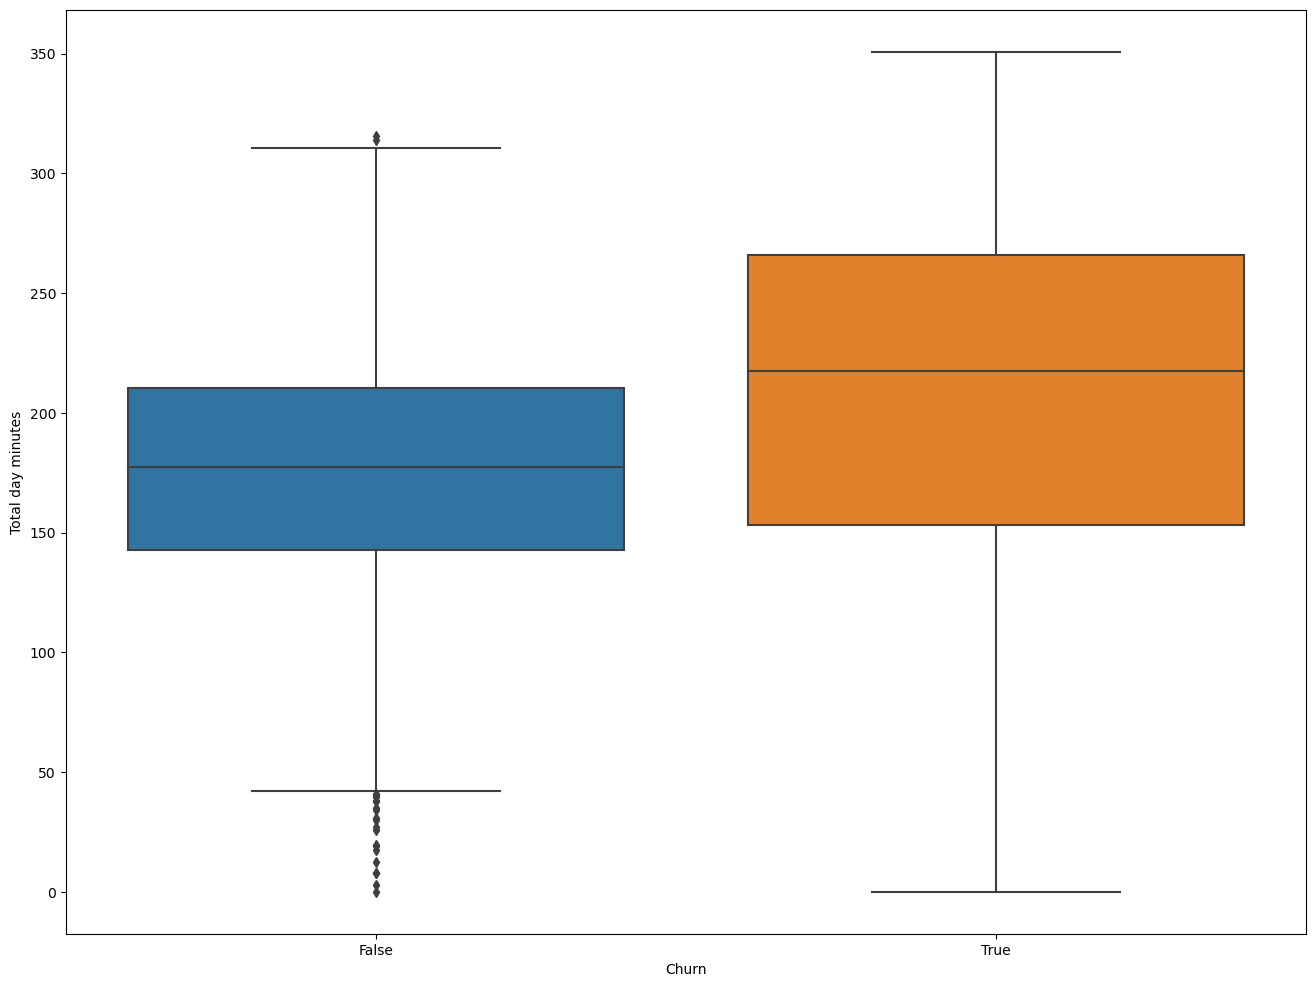

In [20]:
sns.boxplot(x = "Churn", y='Total day minutes', data = df);

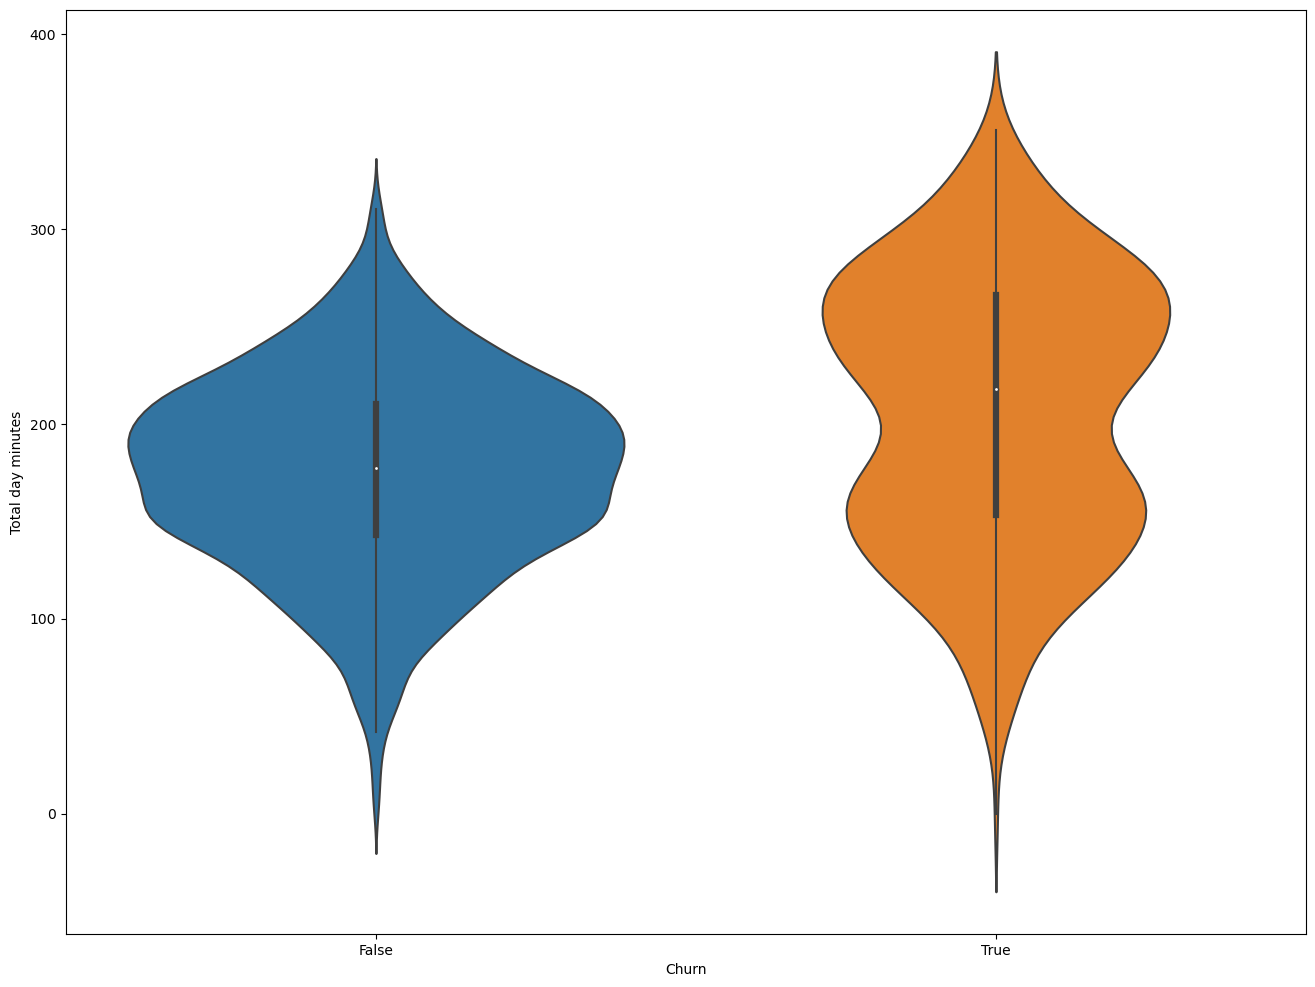

In [21]:
sns.violinplot(x = "Churn", y='Total day minutes', data = df);# типо боксплот

In [22]:
df.groupby("International plan")["Total day minutes"].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

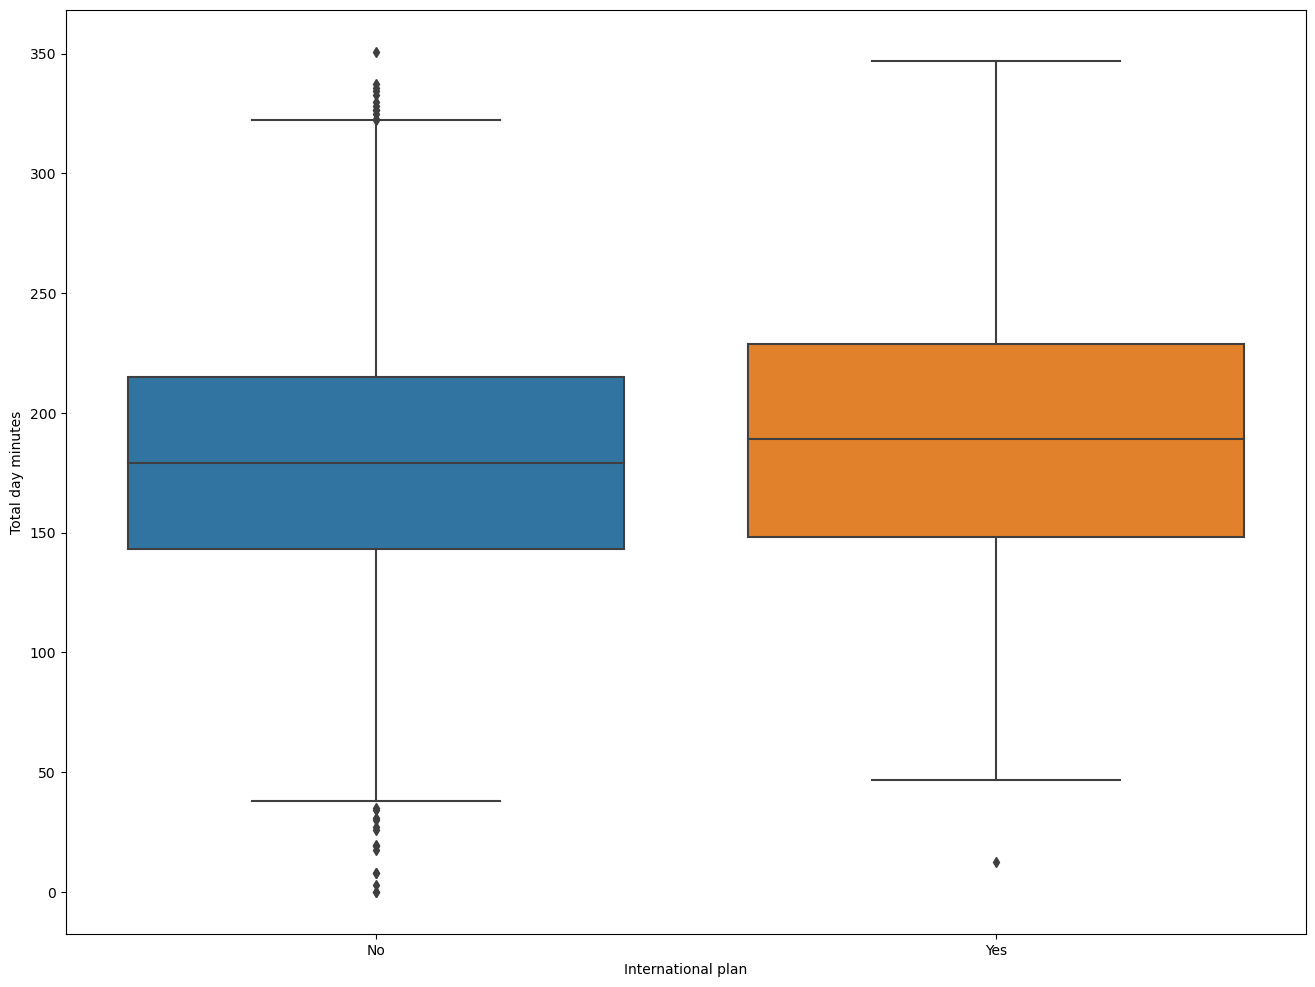

In [23]:
sns.boxplot(x = "International plan", y='Total day minutes', data = df);

In [24]:
pd.crosstab(df['Churn'], df["International plan"])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


## 2.3. Категориальный с категориальным
countplot

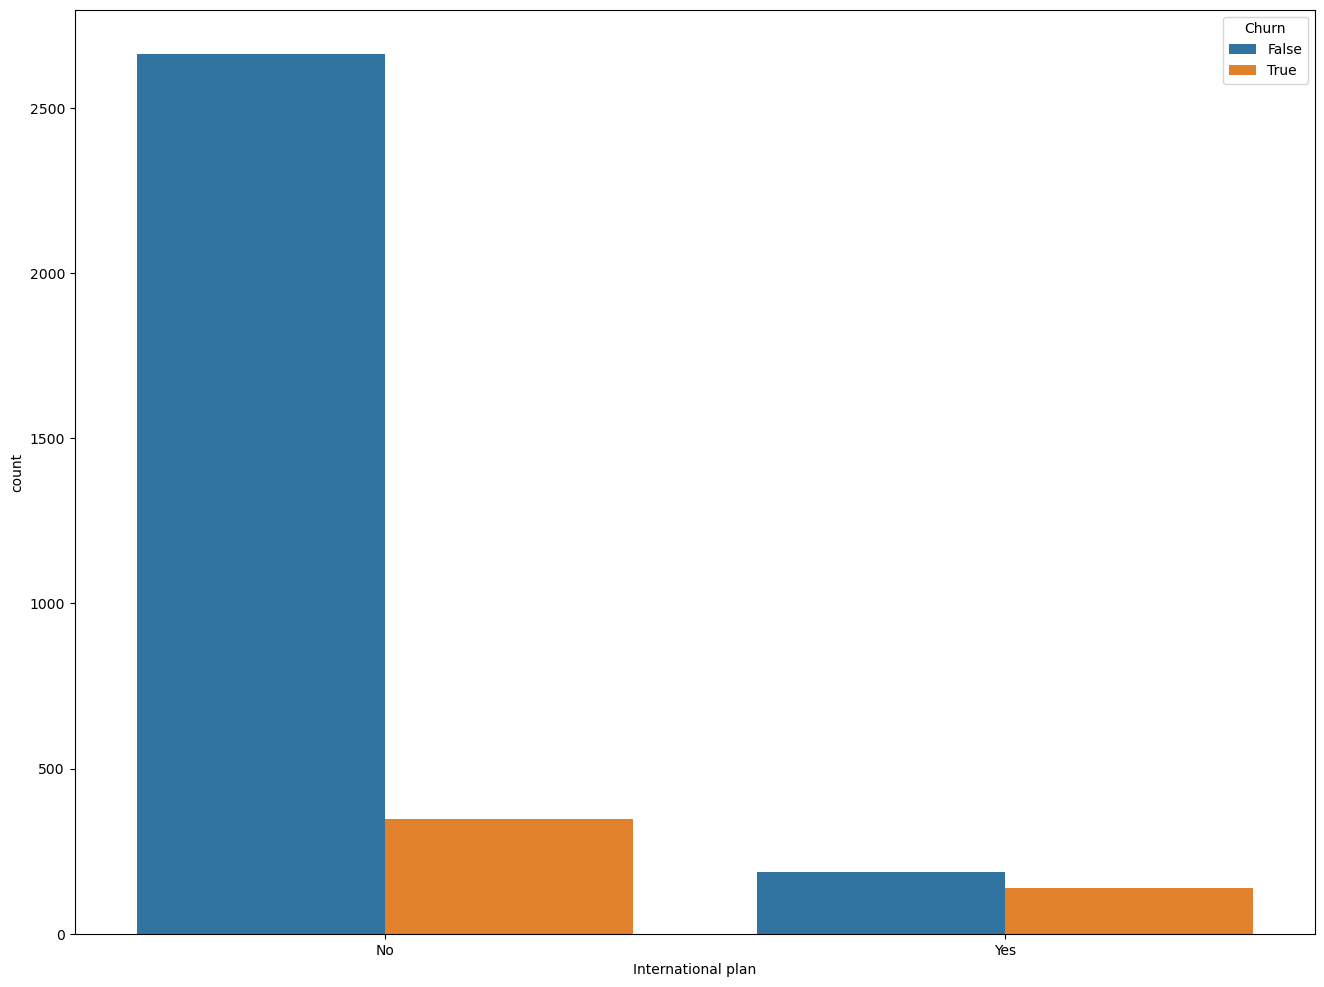

In [25]:
sns.countplot(x='International plan', hue='Churn', data=df);

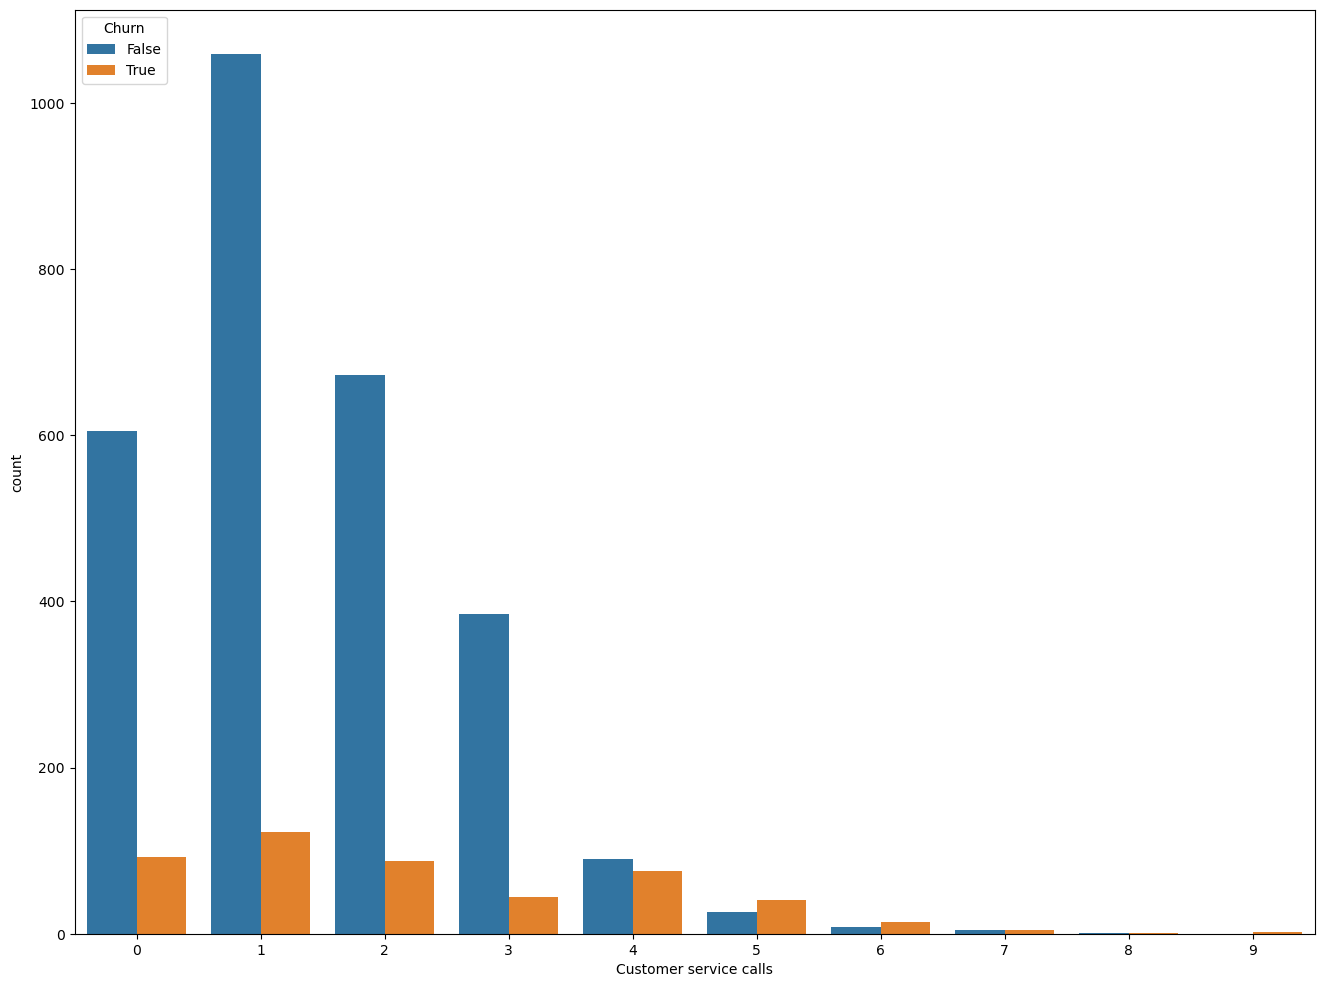

In [26]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

## 3. Прочее
Manifold learning, один из представителей – t-SNE

In [27]:
from sklearn.manifold import TSNE

In [28]:
tsne = TSNE(random_state=0)

In [29]:
df2 = df.drop('State', axis=1)

In [30]:
df2["International plan"] = df2["International plan"].map({"Yes": 1, "No": 0})
df2["Voice mail plan"] = df2["Voice mail plan"].map({"Yes": 1, "No": 0})

In [31]:
df2.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [32]:
%%time
tsne.fit(df2)

D:\Program files\ana3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Program files\ana3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Wall time: 19 s


TSNE(random_state=0)

In [33]:
tsne_repr = tsne.embedding_

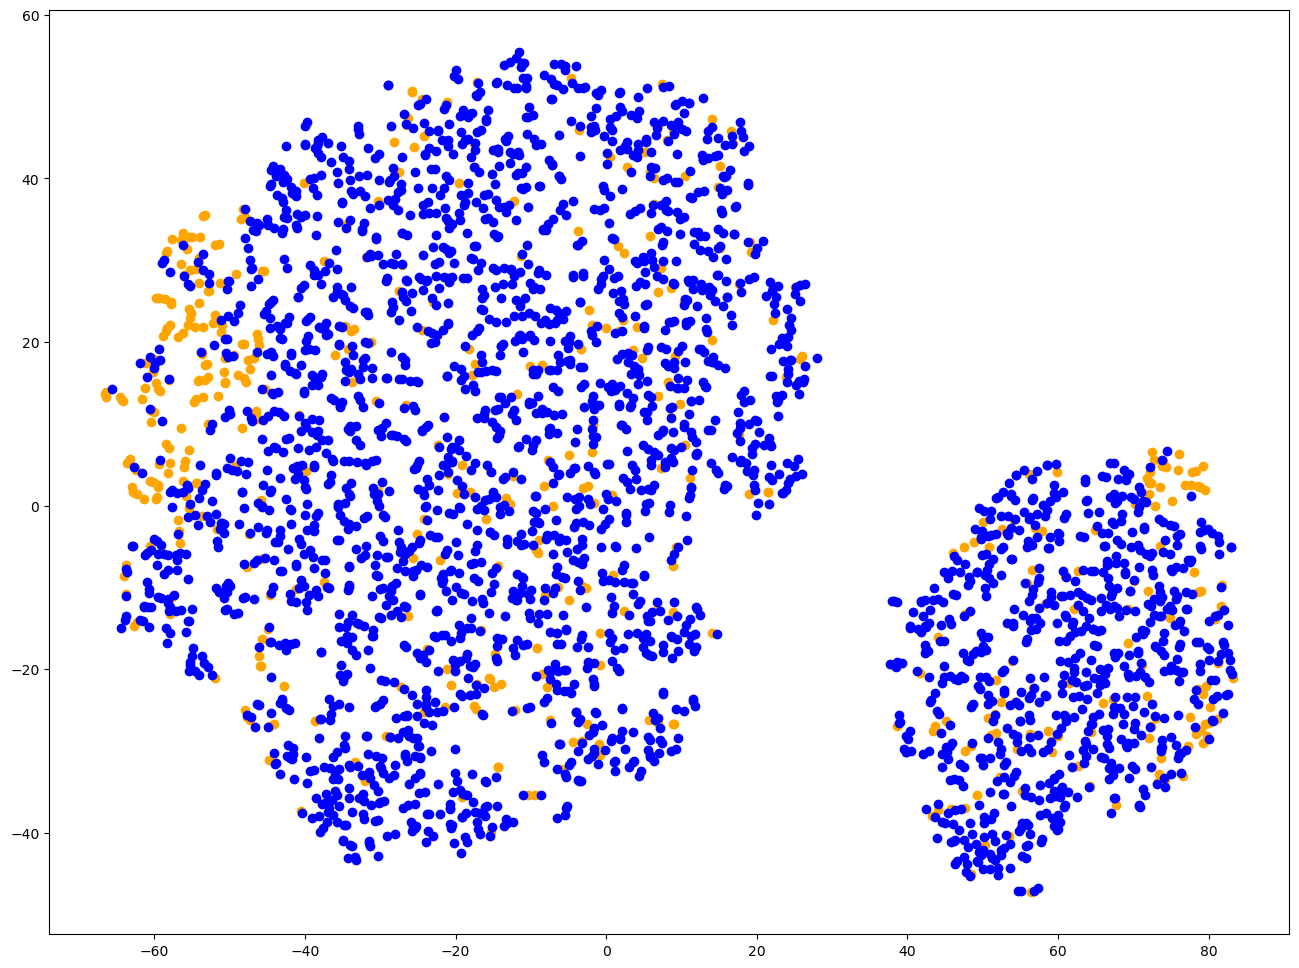

In [34]:
plt.scatter(tsne_repr[df2['Churn'].values,0], tsne_repr[df2['Churn'].values,1], color = 'orange');
plt.scatter(tsne_repr[~df2['Churn'].values,0],tsne_repr[~df2['Churn'].values,1], color = 'blue');